# Lab 1: Heart Disease Classification

**Done By:**
- Name: Sudip Parajuli
- Roll: PUR077BEI041
- Faculty: BEI

**Submitted To:**
- Name: Pukar Karki
- Department of Electronics and Computer Engineering 
- IOE Purwanchal Campus, Dharan

# Importing Necessary Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Define column names based on the dataset's documentation or your knowledge of its structure
data = pd.read_csv('data.sudip', sep='\s+', header=None)

Defining Headers

In [44]:
data.columns = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
    'exercise_induced_angina', 'oldpeak', 'slope',
    'number_of_vessels_colored', 'thal', 'class', 'missing_column'
]
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


Converting the Columns to the Categorical Variables i.e
Preprocessing 

In [45]:
data['sex'] = data['sex'].apply(lambda x: 0 if x.lower().startswith('f') else 1)

In [46]:
#(angina, abnang, notang, asympt)
data['chest_pain_type'] = data['chest_pain_type'].apply(lambda x: 1 if x.lower().startswith('angina') else 2 if x.lower().startswith('abnang') else 3 if x.lower().startswith('notang') else 4)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [47]:
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].apply(lambda x: 0 if x.lower().startswith('f') else 1)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,1,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [48]:

data['resting_ecg'] = data['resting_ecg'].apply(lambda x: 0 if x.lower().startswith('norm') else 1 if x.lower().startswith('abn') else 2)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,1,2,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,2,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,2,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,0,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,2,172.0,fal,1.4,up,0.0,norm,buff,H


In [49]:
data['exercise_induced_angina'] = data['exercise_induced_angina'].apply(lambda x: 0 if x.lower().startswith('f') else 1)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,down,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,flat,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,flat,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,down,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,up,0.0,norm,buff,H


In [50]:
#(up, flat, down)
data['slope'] = data['slope'].apply(lambda x: 1 if x.lower().startswith('up') else 2 if x.lower().startswith('flat') else 3)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,fix,buff,H
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,norm,sick,S2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,rev,sick,S1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,norm,buff,H
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,norm,buff,H


In [51]:
# thal (norm, fixed, rever)
data['thal'] = data['thal'].apply(lambda x: 3 if x.lower().startswith('norm') else 6 if x.lower().startswith('fixed') else 7)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,missing_column
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,7,buff,H
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,sick,S2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,sick,S1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,buff,H
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,buff,H


In [52]:
data.drop('missing_column', axis=1, inplace=True)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,7,buff
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,sick
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,sick
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,buff
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,buff


In [53]:
data['class'] = data['class'].apply(lambda x: 0 if x.lower().startswith('bu') else 1)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,7,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0


In [54]:
# i need to drop every row if any of the column contains ? 
data = data[~(data == '?').any(axis=1)]

## Data Visualization

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        298 non-null    float64
 1   sex                        298 non-null    int64  
 2   chest_pain_type            298 non-null    int64  
 3   resting_blood_pressure     298 non-null    float64
 4   cholesterol                298 non-null    float64
 5   fasting_blood_sugar        298 non-null    int64  
 6   resting_ecg                298 non-null    int64  
 7   max_heart_rate             298 non-null    float64
 8   exercise_induced_angina    298 non-null    int64  
 9   oldpeak                    298 non-null    float64
 10  slope                      298 non-null    int64  
 11  number_of_vessels_colored  298 non-null    object 
 12  thal                       298 non-null    int64  
 13  class                      298 non-null    int64  
dtyp

In [56]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,thal,class
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.510067,0.677852,3.157718,131.580537,246.906040,0.147651,0.993289,149.466443,0.328859,1.055369,1.604027,4.812081,0.459732
std,9.030526,0.468085,0.963277,17.669293,51.893097,0.355350,0.994914,22.983830,0.470589,1.164162,0.617574,1.994501,0.499214
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.500000,0.000000,1.000000,152.500000,0.000000,0.800000,2.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,7.000000,1.000000


In [57]:
data.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_ecg                  0
max_heart_rate               0
exercise_induced_angina      0
oldpeak                      0
slope                        0
number_of_vessels_colored    0
thal                         0
class                        0
dtype: int64

In [58]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,7,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0


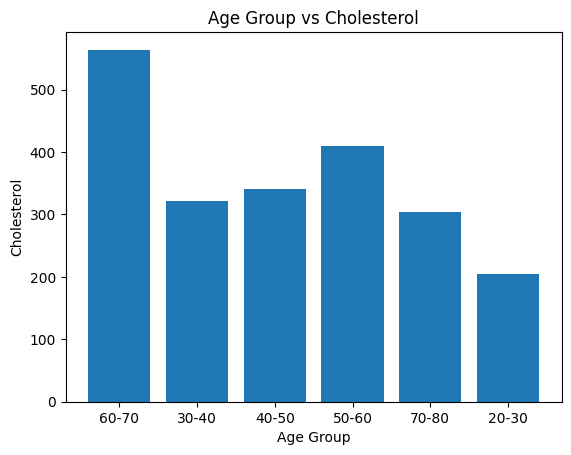

In [59]:
#plotting a bar chart of age on x axis and the corresponding cholestorol level on y axis
#converting the age group to 0-10, 10-20 etc
data['age_group'] = pd.cut(data['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
plt.bar(data['age_group'], data['cholesterol'])
plt.xlabel('Age Group')
plt.ylabel('Cholesterol')
plt.title('Age Group vs Cholesterol')
plt.show()

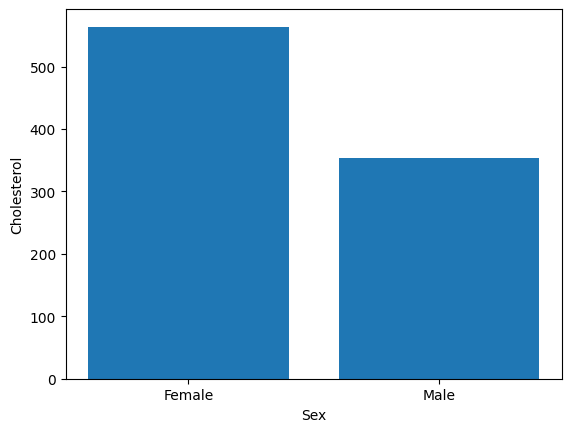

In [60]:
filtered_data = data[data['sex'].isin([0, 1])]
plt.bar(filtered_data['sex'], filtered_data['cholesterol'])
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

In [61]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_vessels_colored,thal,class,age_group
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,7,0,60-70
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,1,60-70
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1,60-70
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0,30-40
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0,40-50


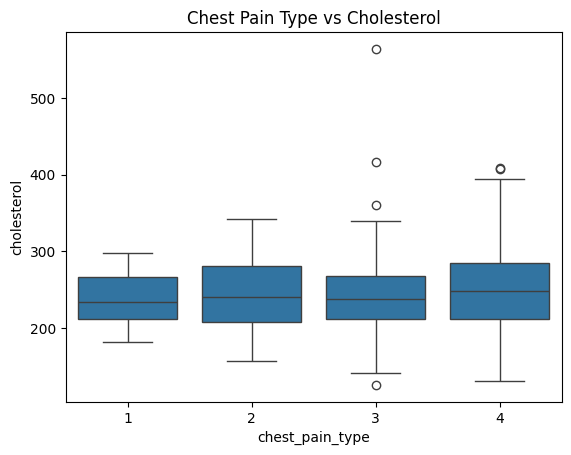

In [62]:
sns.boxplot(x='chest_pain_type', y='cholesterol', data=data)
plt.title('Chest Pain Type vs Cholesterol')
plt.show()

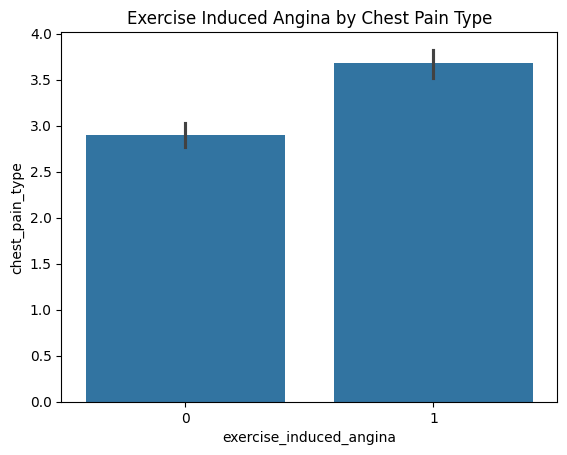

In [63]:
sns.barplot(x='exercise_induced_angina', y='chest_pain_type', data=data)
plt.title('Exercise Induced Angina by Chest Pain Type')
plt.show()

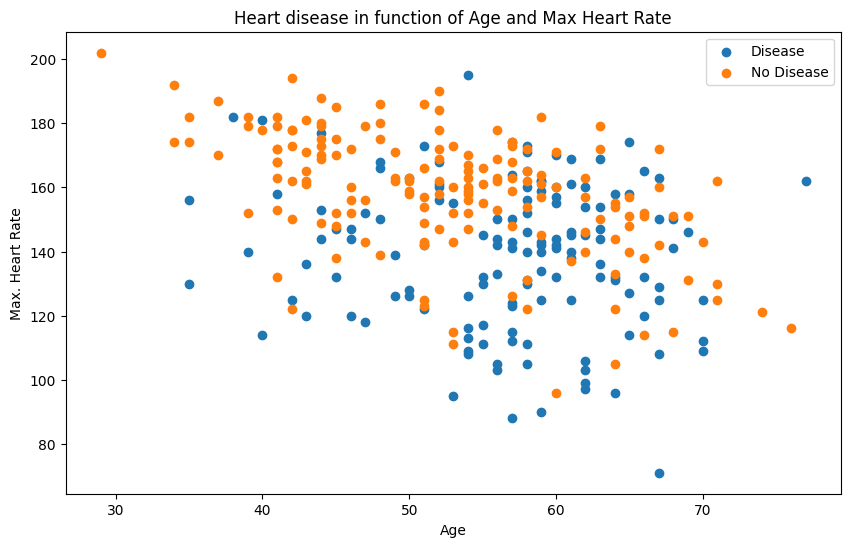

In [64]:
#age vs max heart rate
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = data[data['class']==1]['age'], y = data.max_heart_rate[data["class"]==1])

#Target is equal to 0
plt.scatter(x = data[data['class']==0]['age'], y = data.max_heart_rate[data["class"]==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])


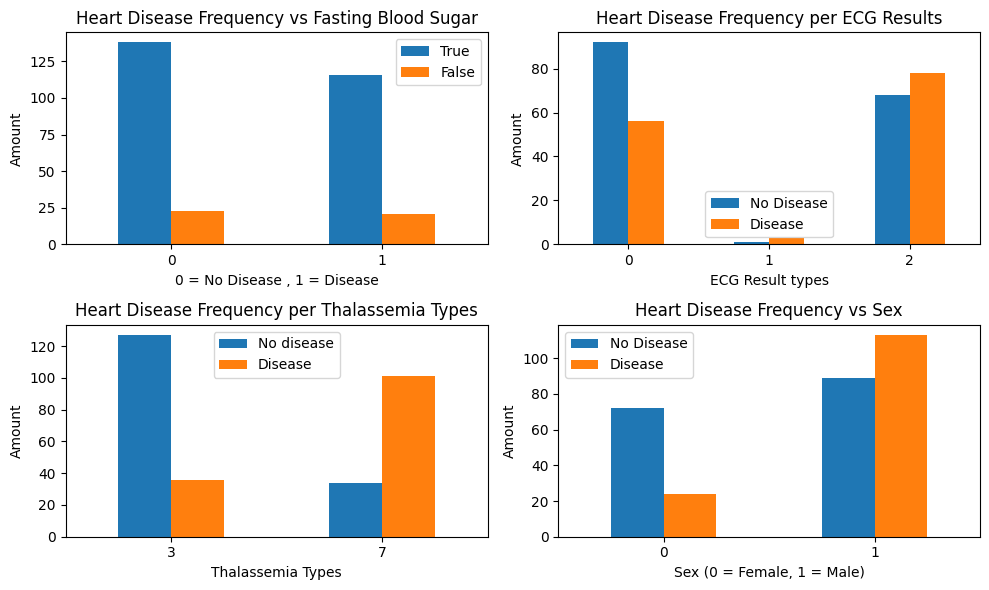

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))  # Adjust figsize as needed

# Plot for Heart Disease Frequency vs Fasting Blood Sugar
pd.crosstab(data['class'], data['fasting_blood_sugar']).plot(kind='bar', ax=axs[0][0])
axs[0][0].set_title("Heart Disease Frequency vs Fasting Blood Sugar")
axs[0][0].set_xlabel("0 = No Disease , 1 = Disease")
axs[0][0].set_ylabel("Amount")
axs[0][0].legend(["True", "False"])
axs[0][0].set_xticklabels(axs[0][0].get_xticklabels(), rotation=0)

# Plot for Heart Disease Frequency per ECG Results
pd.crosstab(data['resting_ecg'], data['class']).plot(kind='bar', ax=axs[0][1])
axs[0][1].set_title("Heart Disease Frequency per ECG Results")
axs[0][1].set_xlabel("ECG Result types")
axs[0][1].set_ylabel("Amount")
axs[0][1].legend(['No Disease', 'Disease'])
axs[0][1].set_xticklabels(axs[0][1].get_xticklabels(), rotation=0)

# Plot for Heart Disease Frequency per Thalassemia Types
pd.crosstab(data['thal'], data['class']).plot(kind='bar', ax=axs[1][0])
axs[1][0].set_title("Heart Disease Frequency per Thalassemia Types")
axs[1][0].set_xlabel("Thalassemia Types")
axs[1][0].set_ylabel("Amount")
axs[1][0].legend(['No disease', 'Disease'])
axs[1][0].set_xticklabels(axs[1][0].get_xticklabels(), rotation=0)

# Plot for Heart Disease Frequency vs Sex
pd.crosstab(data['sex'], data['class']).plot(kind='bar', ax=axs[1][1])
axs[1][1].set_title("Heart Disease Frequency vs Sex")
axs[1][1].set_xlabel("Sex (0 = Female, 1 = Male)")
axs[1][1].set_ylabel("Amount")
axs[1][1].legend(['No Disease', 'Disease'])
axs[1][1].set_xticklabels(axs[1][1].get_xticklabels(), rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Classification Model to Predict Heart Disease

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [67]:
X=data.drop('class',axis=1)
X = X.drop('age_group', axis=1)
y=data['class']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((238, 13), (60, 13))

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

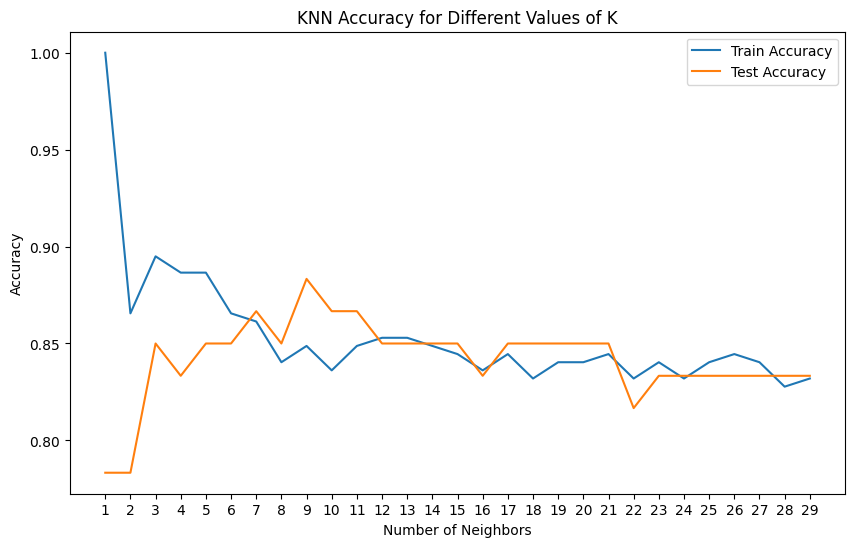

In [71]:
neighbors = range(1, 30)
train_accuracy = []
test_accuracy = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

           0       0.82      0.93      0.88        30
           1       0.92      0.80      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Score:  0.8666666666666667


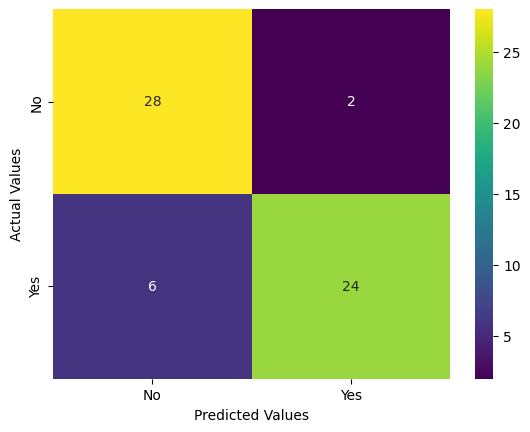

In [73]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap='viridis', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("Score: ", sc)

# RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

RandomForest:  0.8666666666666667


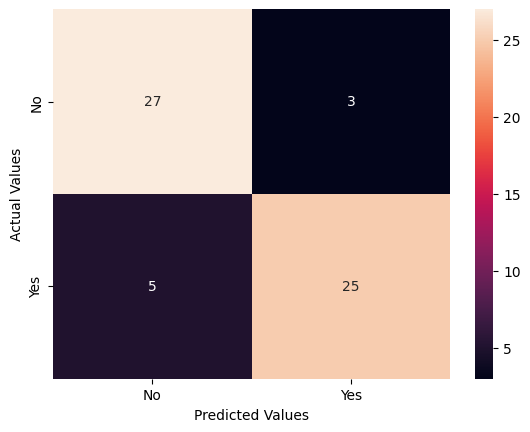

In [76]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)


# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

RandomForest:  0.8666666666666667


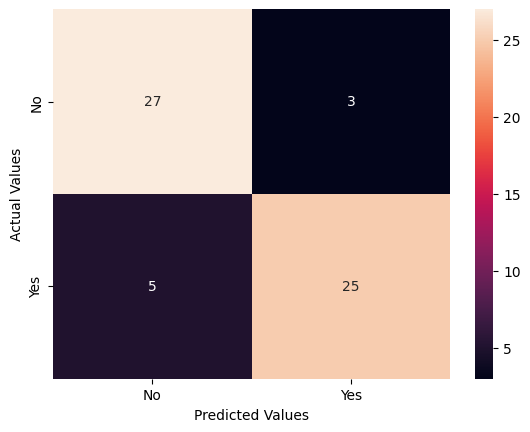

In [79]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)



### Testing Data

In [85]:
input_data = np.array([63.0, 1, 1, 145.0, 233.0, 1, 2, 150.0, 0, 2.3, 3, 0.0, 7])
input_data = input_data.reshape(1, -1)
print(input_data)
input_data = scaler.transform(input_data)
prediction = knn.predict(input_data)
prediction


[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    7. ]]


/home/sudipnext/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])